In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bank Churn.csv')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## EDA USING DTALE:

In [5]:
import dtale

dtale.show(df)

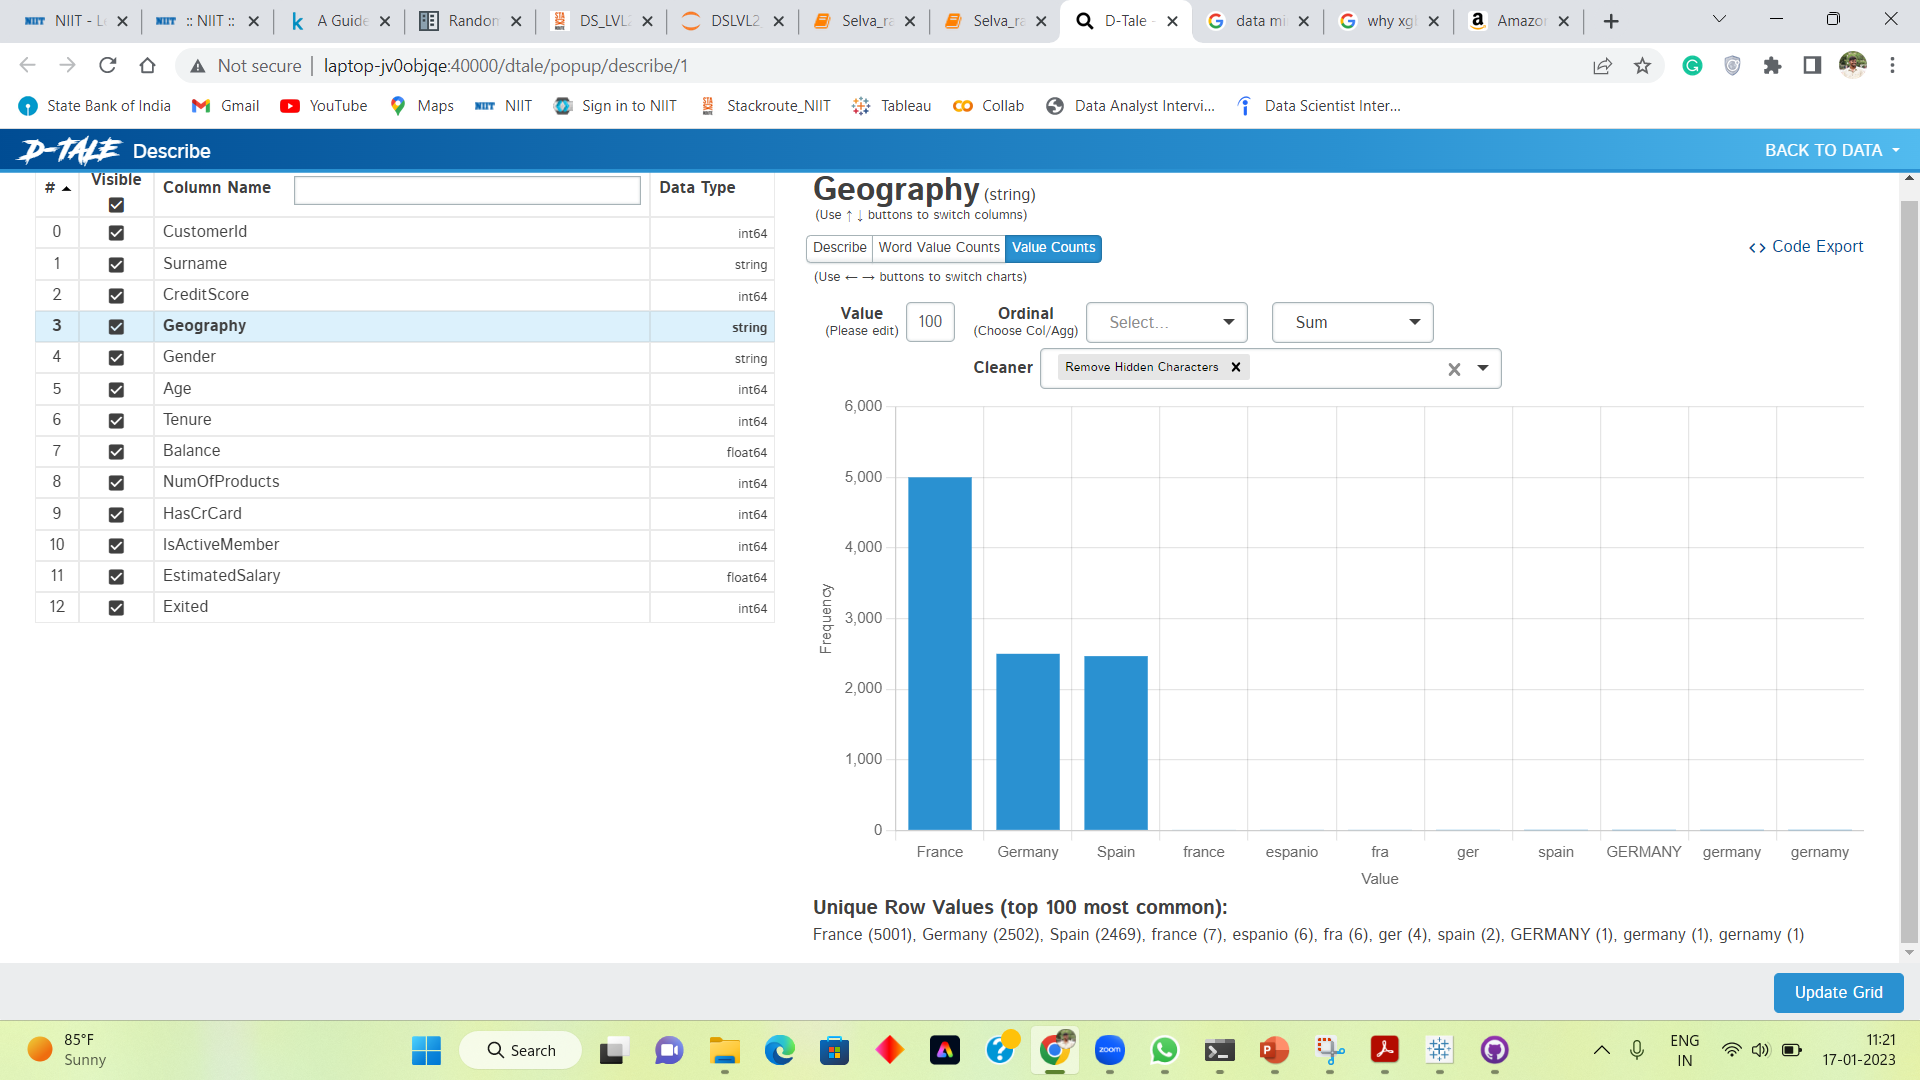

In [6]:
df.replace(['france', 'fra', 'espanio', 'spain', 'ger', 'GERMANY', 'germany', 'gernamy'], ['France', 'France', 'Spain', 'Spain', 'Germany', 'Germany', 'Germany', 'Germany'], inplace=True)

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
def eda(col):
    fg = df[(df["Exited"] == 0) | (df["Exited"] == 1)]
    m = sb.FacetGrid(fg, col = "Exited", height = 7)
    m.map(plt.hist,col,edgecolor='white')
    plt.show()

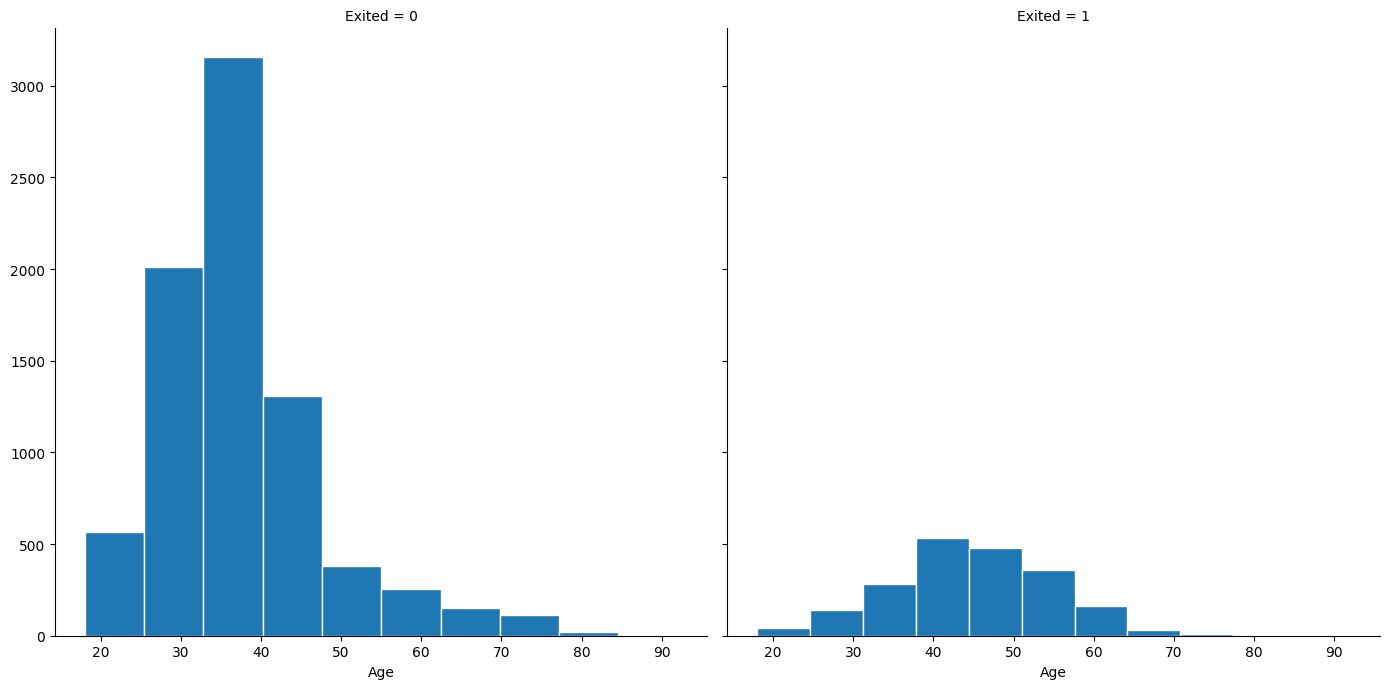

In [24]:
eda('Age')

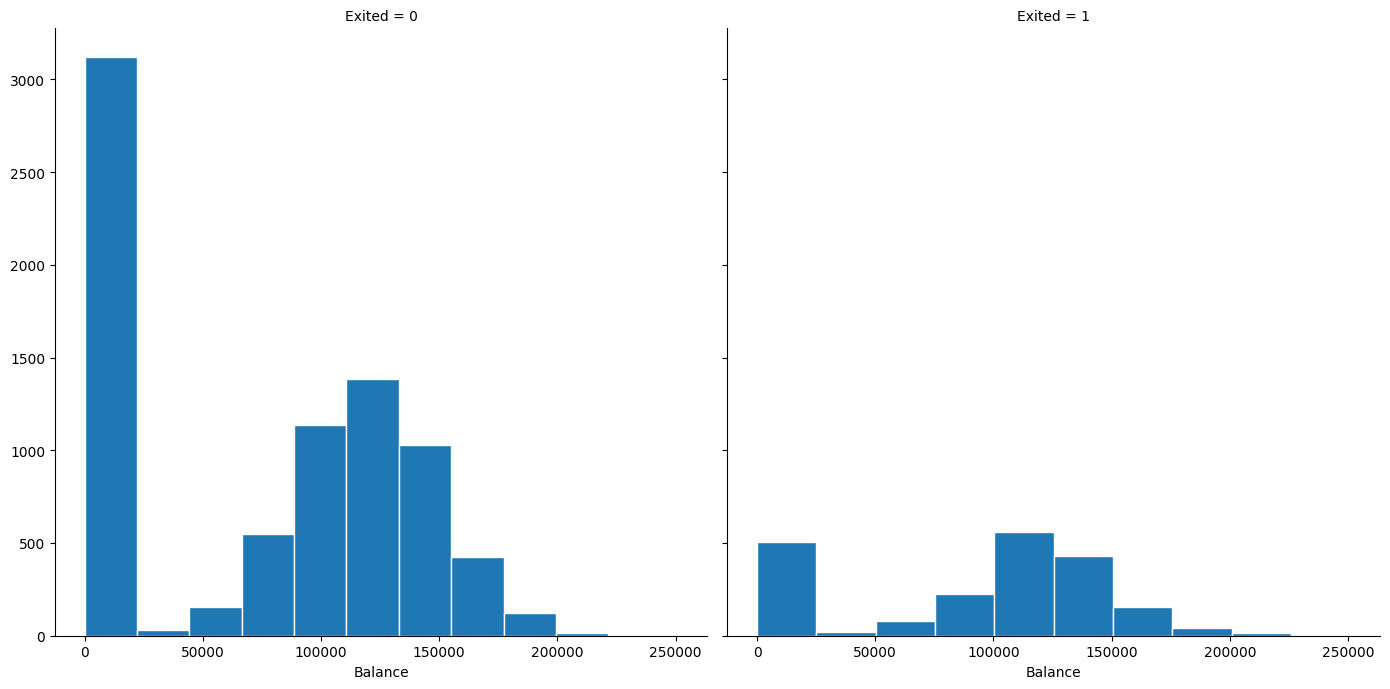

In [25]:
eda('Balance')

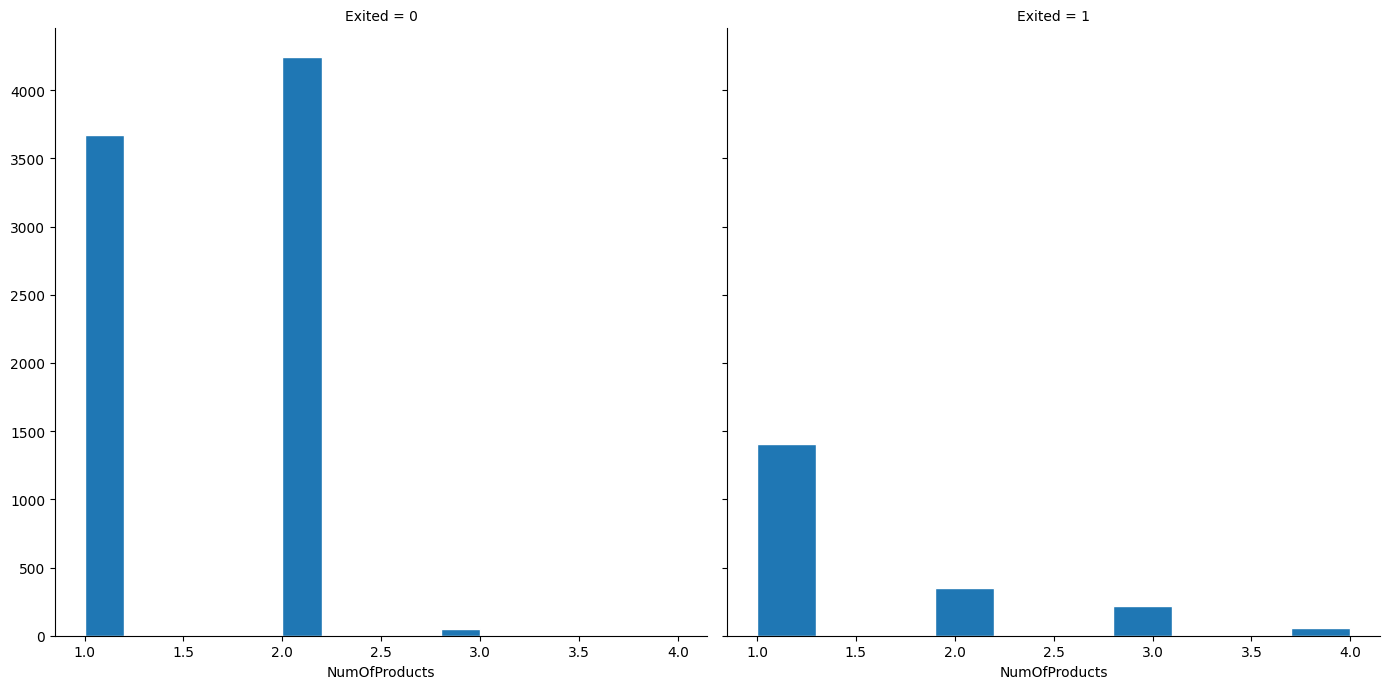

In [26]:
eda('NumOfProducts')

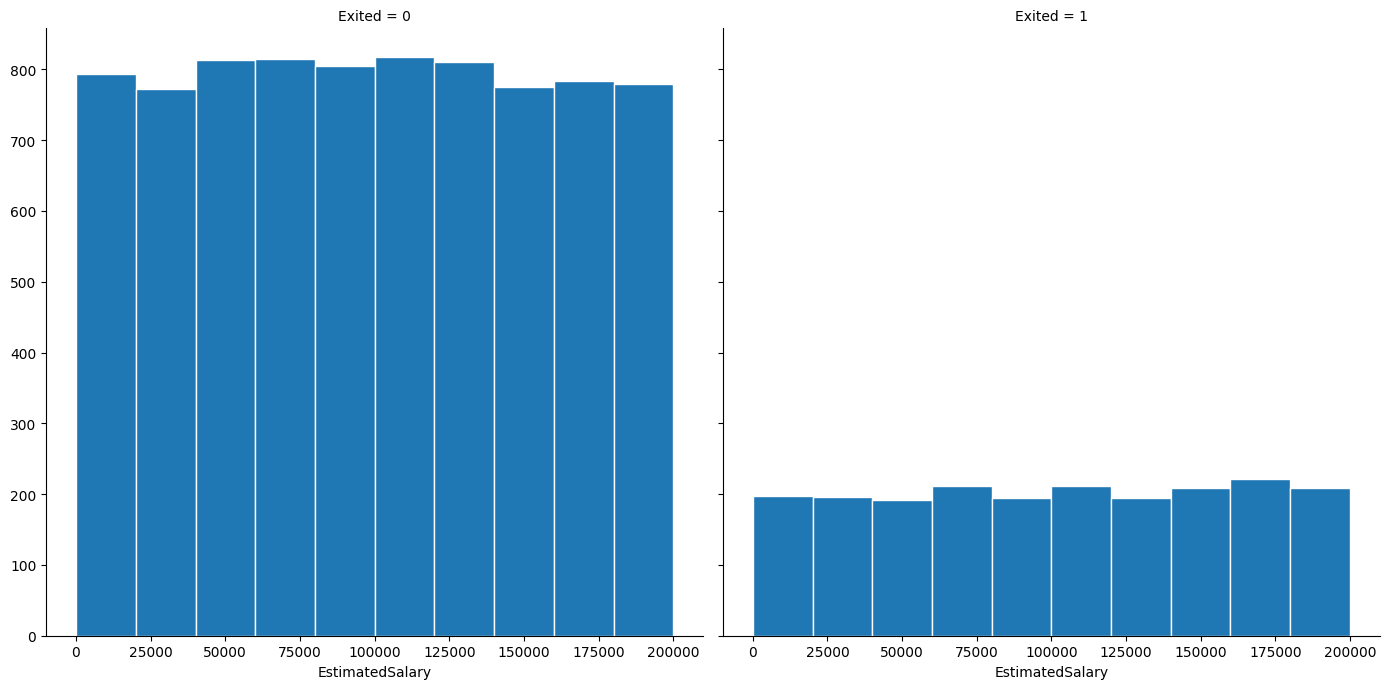

In [27]:
eda('EstimatedSalary')

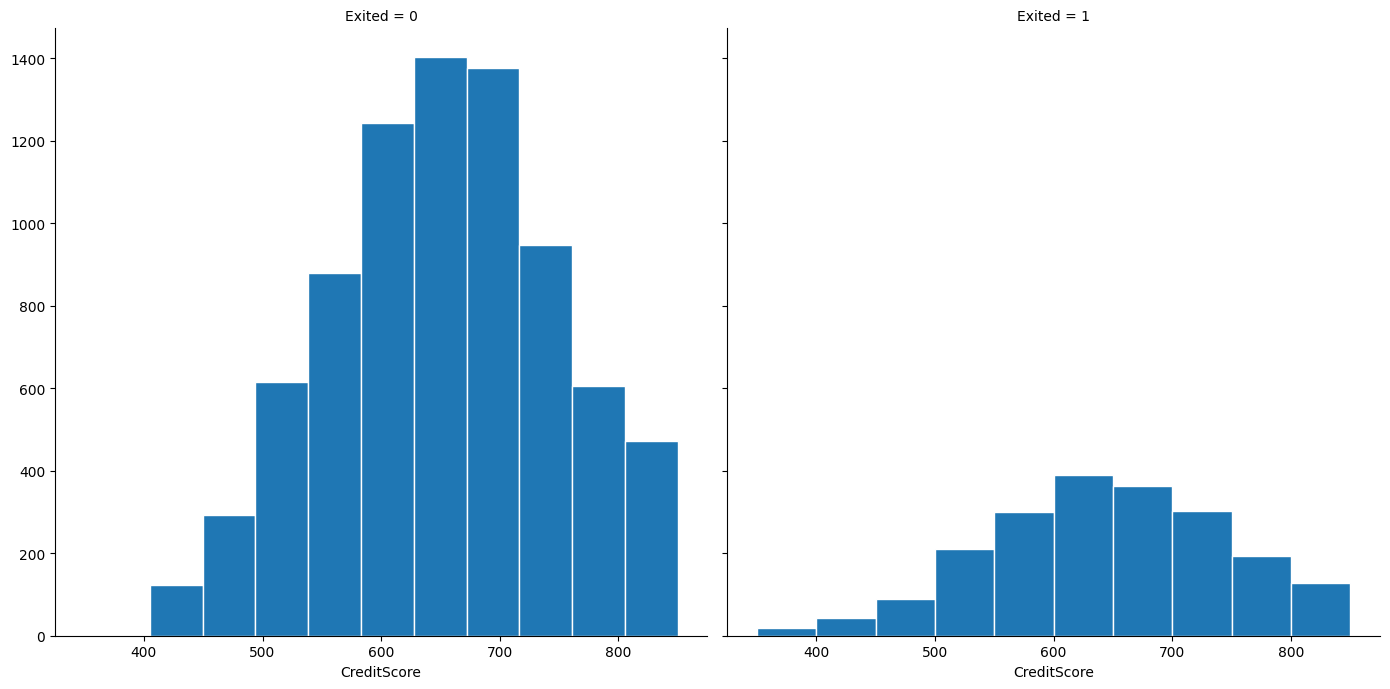

In [28]:
eda('CreditScore')

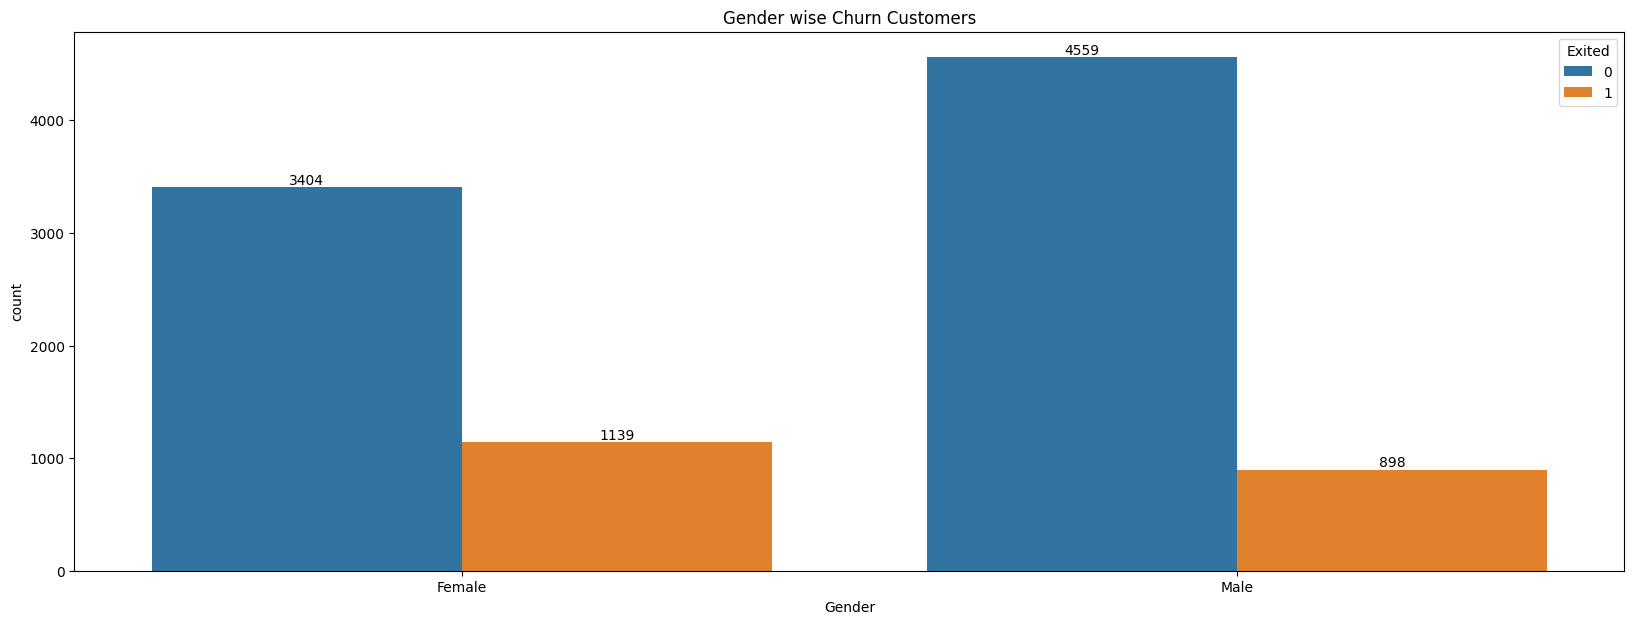

In [29]:
plt.figure(figsize = (20,7))
ax = sb.countplot(x = 'Gender', hue = 'Exited', data = df);
for bar in ax.patches:
    count = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    ax.annotate(count, (x,y), va = 'bottom', ha = 'center')
plt.title('Gender wise Churn Customers')
plt.show()

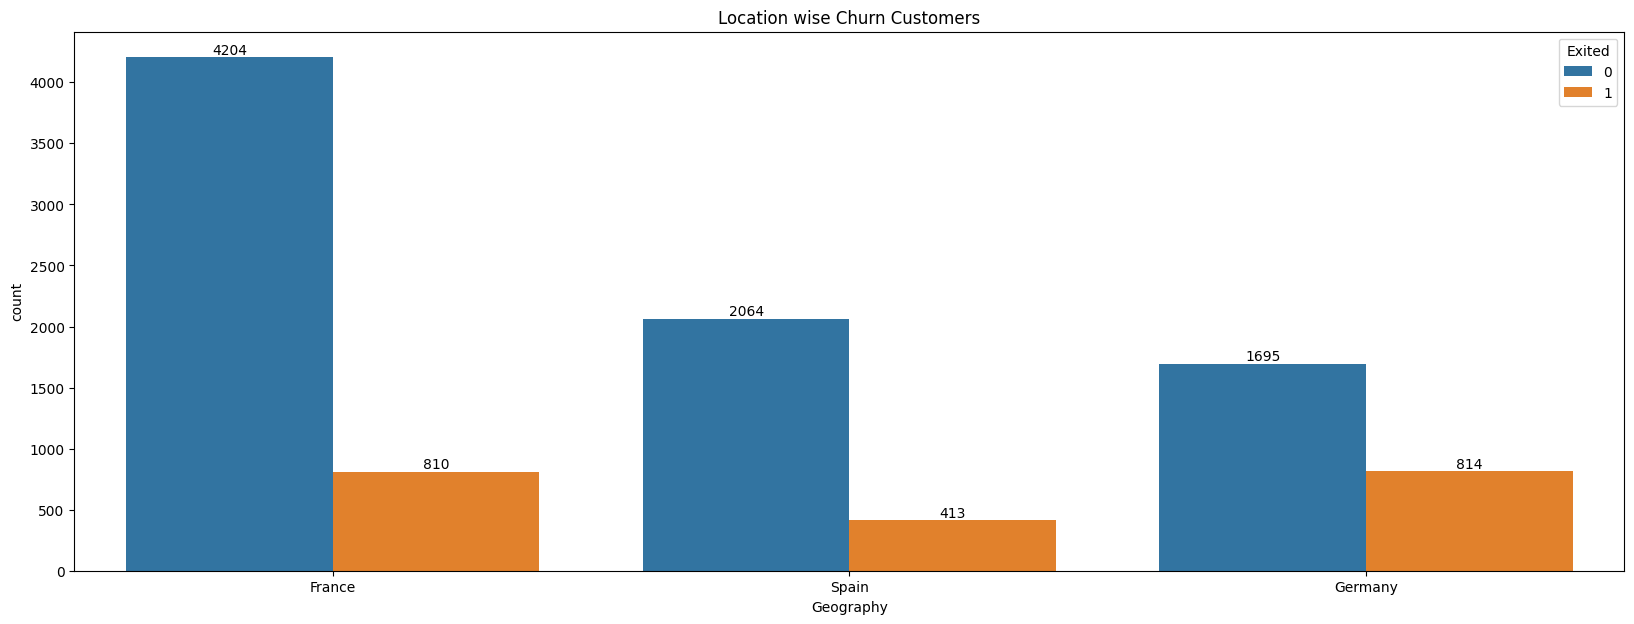

In [30]:
plt.figure(figsize = (20,7))
ax = sb.countplot(x = 'Geography', hue = 'Exited', data = df);
for bar in ax.patches:
    count = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    ax.annotate(count, (x,y), va = 'bottom', ha = 'center')
plt.title('Location wise Churn Customers')
plt.show()

## LABEL ENCODING:

In [31]:
copy_df = df

In [32]:
cat_df = df.select_dtypes(include='object')

In [33]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()

for i in cat_df.columns:
    copy_df[i] = lbl_encoder.fit_transform(copy_df[i])

copy_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [34]:
copy_df.drop('Surname', axis = 1, inplace=True)

## Splitting of Data:

In [35]:
from sklearn.model_selection import train_test_split

y = df['Exited']
x = copy_df
x.drop('Exited', axis=1, inplace=True)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

## DECISION TREE CLASSIFIER:

In [38]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)

In [39]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
dtc.score(x_train, y_train)

1.0

In [41]:
y_pred_dtc = dtc.predict(x_test)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1607
           1       0.47      0.53      0.50       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



In [44]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(dtc, x_train,y_train, scoring='roc_auc', cv=5)
score.mean()

0.6790419589800942

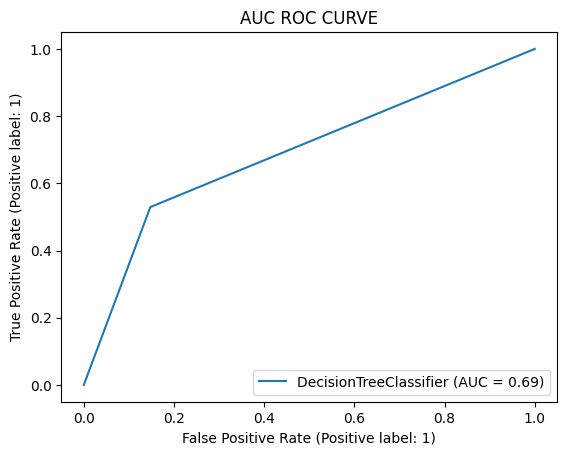

In [45]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

plot_roc_curve(dtc, x_test, y_test)
plt.title('AUC ROC CURVE')
plt.show()

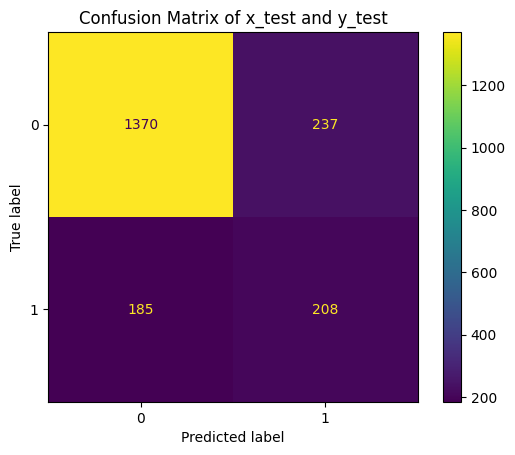

In [46]:
plot_confusion_matrix(dtc, x_test, y_test)
plt.title('Confusion Matrix of x_test and y_test')
plt.show()

## LGBM MODEL CREATION and HYPERPARAMETER TUNING:

In [47]:
import lightgbm as lg
from sklearn.model_selection import GridSearchCV

In [48]:
model = lg.LGBMClassifier(seed=42)

In [49]:
parameters = {
'max_depth' : np.arange(4,12),
'n_estimators' : [10,25,50,100,250,500,750,1000]
}

In [50]:
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc')

In [51]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(seed=42),
             param_grid={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': [10, 25, 50, 100, 250, 500, 750,
                                          1000]},
             scoring='roc_auc')

In [52]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [53]:
grid.best_score_

0.8597309425617812

In [54]:
best_model = lg.LGBMClassifier(max_depth=5, n_estimators=50)

In [55]:
best_model.fit(x_train, y_train)

LGBMClassifier(max_depth=5, n_estimators=50)

In [56]:
best_model.score(x_train, y_train)  # Performance of the training model

0.876875

In [57]:
y_pred = best_model.predict(x_test)  # Prediction of the model

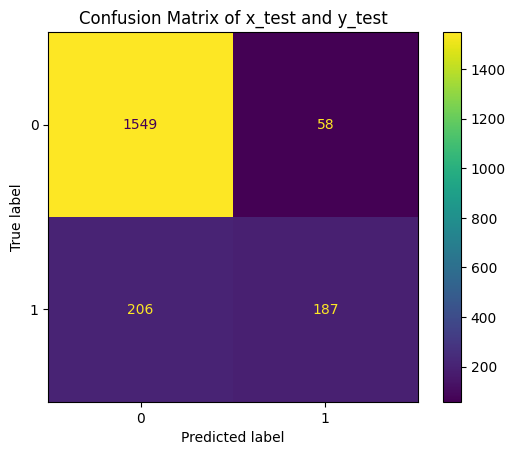

In [58]:
plot_confusion_matrix(best_model, x_test, y_test)
plt.title('Confusion Matrix of x_test and y_test')
plt.show()

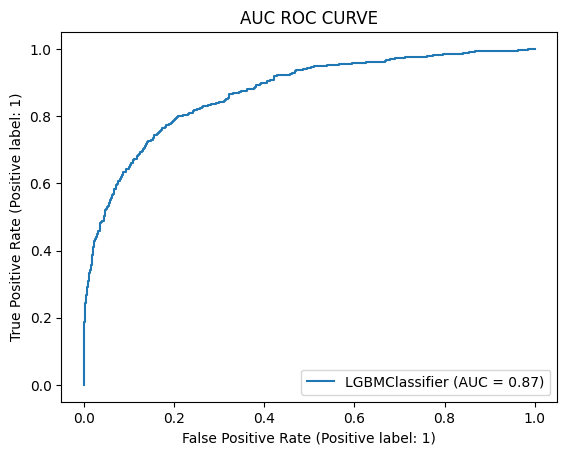

In [59]:
plot_roc_curve(best_model, x_test, y_test)
plt.title('AUC ROC CURVE')
plt.show()

## Model Evaluation:

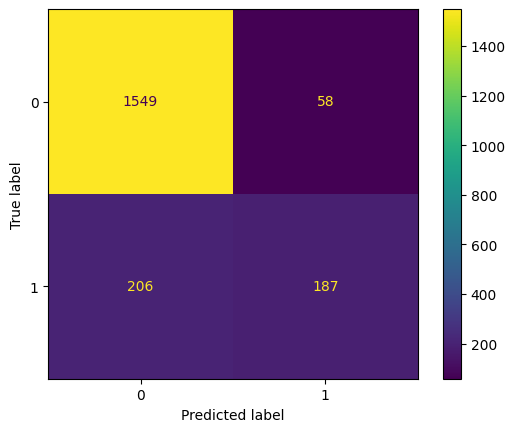

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



In [62]:
from sklearn.metrics import precision_score, accuracy_score

print('Accuracy score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))

Accuracy score 0.868
Precision Score 0.763265306122449


## Given a set of customer record, determine the probabilities of churn for each customer:

In [63]:
y_proba = best_model.predict_proba(x_test)

In [64]:
y_proba

array([[0.96510407, 0.03489593],
       [0.96233002, 0.03766998],
       [0.91311862, 0.08688138],
       ...,
       [0.29441371, 0.70558629],
       [0.86877782, 0.13122218],
       [0.73940583, 0.26059417]])

## Feature Importances:

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

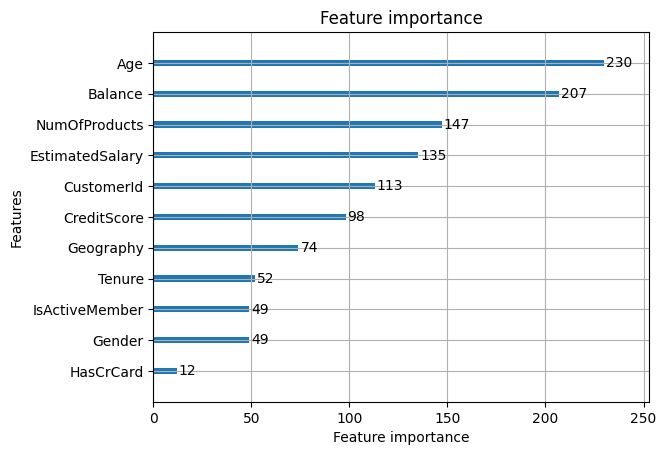

In [65]:
lg.plot_importance(best_model)

## Final Predictions:

In [66]:
x_test

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,15687492,596,1,1,32,3,96709.07,2,0,0,41788.37
4684,15736963,623,0,1,43,1,0.00,2,1,1,146379.30
1731,15721730,601,2,0,44,4,0.00,2,1,0,58561.31
4742,15762134,506,1,1,59,8,119152.10,2,1,1,170679.74
4521,15648898,560,2,0,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...,...
6412,15598982,602,1,0,53,5,98268.84,1,0,1,45038.29
8285,15572631,609,0,1,25,10,0.00,1,0,1,109895.16
7853,15746674,730,0,0,47,7,0.00,1,1,0,33373.26
1095,15689081,692,0,1,29,4,0.00,1,1,0,76755.99


In [67]:
x_test['Churn Pred'] = y_pred

In [68]:
x_test['No Churn Prob'] = y_proba[:,0:1]

In [69]:
x_test['Yes Churn Prob'] = y_proba[:,1:2]

In [70]:
x_test

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn Pred,No Churn Prob,Yes Churn Prob
6252,15687492,596,1,1,32,3,96709.07,2,0,0,41788.37,0,0.965104,0.034896
4684,15736963,623,0,1,43,1,0.00,2,1,1,146379.30,0,0.962330,0.037670
1731,15721730,601,2,0,44,4,0.00,2,1,0,58561.31,0,0.913119,0.086881
4742,15762134,506,1,1,59,8,119152.10,2,1,1,170679.74,0,0.808590,0.191410
4521,15648898,560,2,0,27,7,124995.98,1,1,1,114669.79,0,0.881878,0.118122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,15598982,602,1,0,53,5,98268.84,1,0,1,45038.29,1,0.459668,0.540332
8285,15572631,609,0,1,25,10,0.00,1,0,1,109895.16,0,0.885539,0.114461
7853,15746674,730,0,0,47,7,0.00,1,1,0,33373.26,1,0.294414,0.705586
1095,15689081,692,0,1,29,4,0.00,1,1,0,76755.99,0,0.868778,0.131222


In [71]:
Top_10_No_Churn = x_test.sort_values(by = ['No Churn Prob'], ascending=False).head(10)

In [72]:
Top_10_No_Churn

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn Pred,No Churn Prob,Yes Churn Prob
353,15812007,670,2,1,25,6,0.0,2,1,1,78358.94,0,0.990849,0.009151
3455,15580988,842,0,1,29,8,0.0,2,1,1,123437.05,0,0.990376,0.009624
93,15640635,769,0,1,29,8,0.0,2,1,1,172290.61,0,0.989803,0.010197
971,15801488,723,0,1,25,3,0.0,2,1,1,134509.47,0,0.989794,0.010206
9862,15651958,756,0,1,27,8,0.0,2,1,1,157932.75,0,0.989452,0.010548
360,15803716,706,2,1,28,3,0.0,2,0,1,181543.67,0,0.989236,0.010764
7456,15598614,790,2,1,20,8,0.0,2,1,0,168152.76,0,0.989119,0.010881
9729,15615330,651,0,1,23,10,0.0,2,1,1,170099.23,0,0.989117,0.010883
211,15624592,603,0,1,31,8,0.0,2,1,1,169915.02,0,0.988790,0.011210
4982,15569120,615,0,1,30,7,0.0,2,1,1,156346.84,0,0.988623,0.011377


In [73]:
l1 = list(Top_10_No_Churn['CustomerId'])
l1

[15812007,
 15580988,
 15640635,
 15801488,
 15651958,
 15803716,
 15598614,
 15615330,
 15624592,
 15569120]

In [74]:
Top_10_Churn = x_test.sort_values(by = ['No Churn Prob'], ascending=False).tail(10)

In [75]:
Top_10_Churn

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn Pred,No Churn Prob,Yes Churn Prob
6255,15589017,547,1,1,55,4,111362.76,3,1,0,16922.28,1,0.028174,0.971826
1254,15610383,628,0,0,46,1,46870.43,4,1,0,31272.14,1,0.026041,0.973959
8683,15599329,697,0,0,49,7,195238.29,4,0,1,131083.56,1,0.024559,0.975441
6911,15710087,705,1,0,54,3,125889.30,3,1,0,96013.50,1,0.022430,0.977570
4511,15568006,634,0,0,45,2,0.00,4,1,0,101039.53,1,0.022324,0.977676
5137,15601594,698,0,0,51,6,144237.91,4,1,0,157143.61,1,0.017665,0.982335
6221,15603554,513,0,0,45,0,164649.52,3,1,0,49915.52,1,0.017503,0.982497
871,15692750,629,1,0,45,7,129818.39,3,1,0,9217.55,1,0.016800,0.983200
7457,15668889,665,1,0,43,2,116322.27,4,1,0,35640.12,1,0.014811,0.985189
2614,15640846,546,1,0,58,3,106458.31,4,1,0,128881.87,1,0.013945,0.986055


In [76]:
l2 = list(Top_10_Churn['CustomerId'])
l2

[15589017,
 15610383,
 15599329,
 15710087,
 15568006,
 15601594,
 15603554,
 15692750,
 15668889,
 15640846]

## Conclusion:

#### LGBM is the best suited model for the given dataset because the ROC AUC Score is higher compared to DTC.

1) Why I Choosed LightGBM MODEL?

    1) LightGBM model uses smart feature engineering technique.
    2) It works based on Gradient based one sided sampling.

2) Let me explain this Gradient based one sided sampling:

    - Basically, in gradient boosting we analyse that if gradient is large means error is large. So in LGBM it will sort the gradients in descending order. 
    - It will 20% of data where the gradient is high and also it select random 10% (out of remaining 80%) which is predicted correctly from that it forms a model.
    - But whereas other algorithms selects the same data and predict the result. Whereas LGBM can seggregate the data by its own.
    
3) From Confusion Matrix of LGBM Model:

    - ROC-AUC Score: It is one of the popular and important metrics for evaluating the performance of the classification    model.     
    - LGBM Model is predicting 1736 correct outcomes with respect to the total of 2000.

4) Important Features Deciding the Churn of Customers are:

    - Age
    - Balance
    - No of Products
    - Estimated Salary
    - Credit Score

5) Probability of Top 10 Probability of customers who can stay with the Bank:

    - 15812007, 15580988, 15640635, 15801488, 15651958, 15803716, 15598614, 15615330, 15624592, 15569120

6) Probability of Top 10 Probability of customers who can leave the Bank:

    - 15589017, 15610383, 15599329, 15710087, 15568006, 15601594, 15603554, 15692750, 15668889, 15640846